[0.9461866666666714, 0.9461866666666854, 0.9438666666666707, 0.943833333333346, 0.9436480000000295, 0.9428666666666704, 0.9402019047619106]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


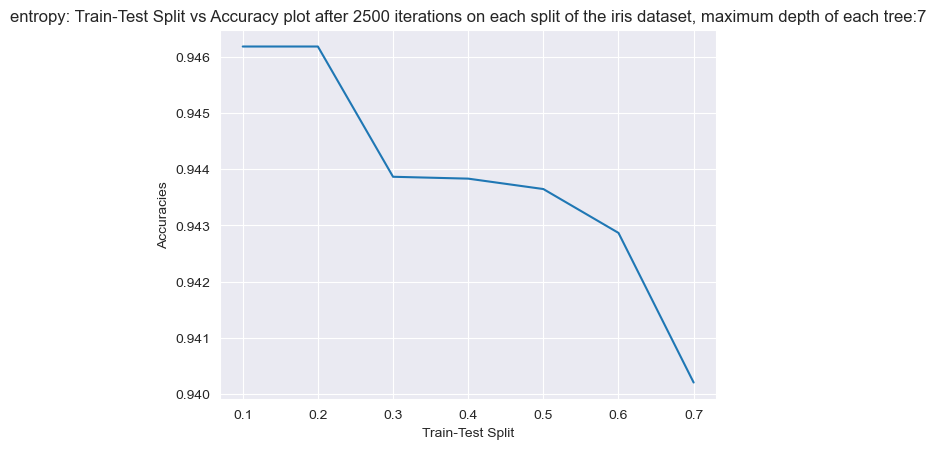

In [82]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def split_plot_function_decision_tree_iris(start_split=10, end_split=70, criterion="entropy",max_depth=7):
  iris = load_iris()
  # print(iris)

  df = pd.DataFrame(iris.data, columns= iris.feature_names)
  df['target'] = iris.target # ground class stored in 'target' column/field of the dataframe
  # 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2

  # print(df)
  # print(iris.feature_names)
  accuracies = []
  split_values = []
  features = iris.feature_names # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  X = df[features]
  y = df['target']

  for i in range(start_split,end_split+1, 10):
    split_values.append(i/100)
    acc = 0
    for j in range(0,2500):
      train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = i/100)
      decision_tree_model = DecisionTreeClassifier(max_depth = max_depth, criterion=criterion)
      decision_tree_model.fit(train_X, train_y)
      pred_y = decision_tree_model.predict(test_X)
      acc += accuracy_score(test_y, pred_y)
    acc/=2500
    accuracies.append(acc)
  print(accuracies)
  print(split_values)

  data = pd.DataFrame(list(zip(accuracies, split_values)), columns=['Accuracies','Train-Test Split'])
  sns.lineplot(data=data, y='Accuracies', x='Train-Test Split').set_title(criterion + ": Train-Test Split vs Accuracy plot after 2500 iterations on each split of the iris dataset, maximum depth of each tree:" + str(max_depth))

split_plot_function_decision_tree_iris(criterion="entropy",)

[0.930280701754402, 0.9310394736842181, 0.9305350877193093, 0.9294692982456173, 0.9271754385964932, 0.9239385964912317, 0.9192932330827078]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


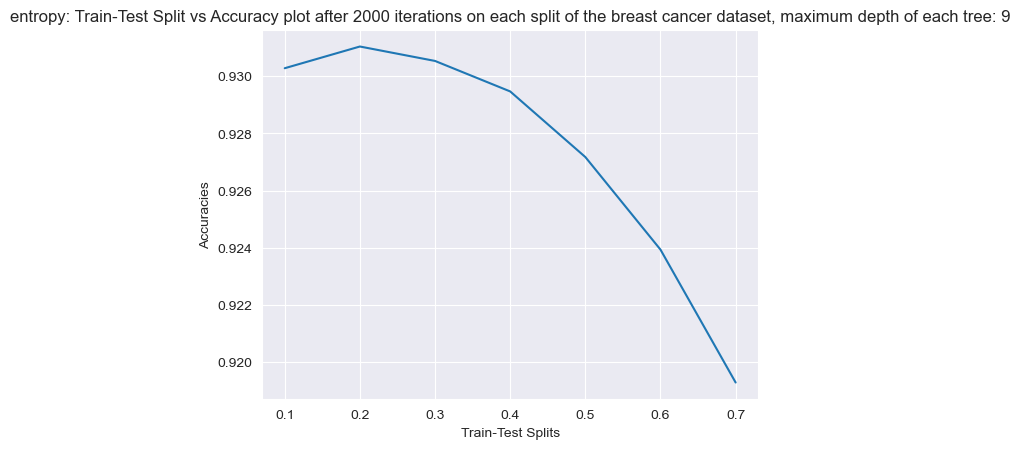

In [83]:
from sklearn.datasets import load_breast_cancer

def split_plot_function_decision_tree_breast_cancer(start_split=10, end_split=70, criterion="entropy",max_depth=9):
  iris = load_breast_cancer()
  # print(iris)

  df = pd.DataFrame(iris.data, columns= iris.feature_names)
  df['target'] = iris.target # ground class stored in 'target' column/field of the dataframe
  # 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2

  # print(df)
  # print(iris.feature_names)
  accuracies = []
  split_values = []
  features = iris.feature_names # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  X = df[features]
  y = df['target']

  for i in range(start_split,end_split+1, 10):
    split_values.append(i/100)
    acc = 0
    for j in range(0,2000):
      train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = i/100)
      decision_tree_model = DecisionTreeClassifier(max_depth = max_depth, criterion=criterion)
      decision_tree_model.fit(train_X, train_y)
      pred_y = decision_tree_model.predict(test_X)
      acc += accuracy_score(test_y, pred_y)
    acc/=2000
    accuracies.append(acc)
  print(accuracies)
  print(split_values)

  data = pd.DataFrame(list(zip(accuracies, split_values)), columns=['Accuracies','Train-Test Splits'])
  sns.lineplot(data=data, y='Accuracies', x='Train-Test Splits').set_title(criterion + ": Train-Test Split vs Accuracy plot after 2000 iterations on each split of the breast cancer dataset, maximum depth of each tree: " + str(max_depth))

split_plot_function_decision_tree_breast_cancer(criterion="entropy",)

[0.7034935064935074, 0.7002705627705682, 0.6980750360750376, 0.6958333333333359, 0.69433159722222, 0.6912169197396953, 0.6877168525402725]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


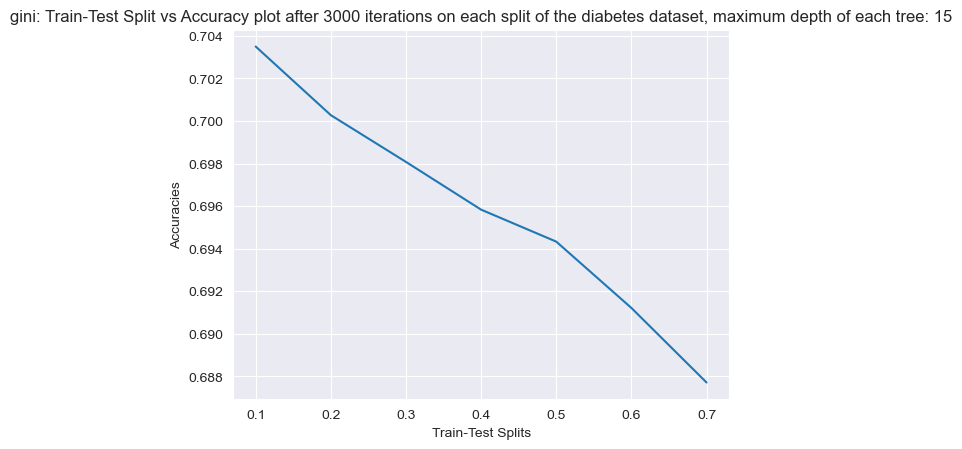

In [84]:
from sklearn.preprocessing import StandardScaler

def split_plot_function_decision_tree_diabetes(start_split=10, end_split=70, criterion="entropy",max_depth=15):

  df = pd.read_csv('diabetes.csv')
  df = df.dropna();
  df.dropna(inplace=True)
  a = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

  y = df['Outcome']
  X = df.drop('Outcome', axis=1)

  accuracies = []
  split_values = []

  for i in range(start_split,end_split+1, 10):
    split_values.append(i/100)
    acc = 0
    for j in range(0,3000):
      train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = i/100)
      scaler = StandardScaler()
      train_X = scaler.fit_transform(train_X)
      test_X = scaler.transform(test_X)
      decision_tree_model = DecisionTreeClassifier(max_depth = max_depth, criterion=criterion)
      decision_tree_model.fit(train_X, train_y)
      pred_y = decision_tree_model.predict(test_X)
      acc += accuracy_score(test_y, pred_y)
    acc/=3000
    accuracies.append(acc)
  print(accuracies)
  print(split_values)

  data = pd.DataFrame(list(zip(accuracies, split_values)), columns=['Accuracies','Train-Test Splits'])
  sns.lineplot(data=data, y='Accuracies', x='Train-Test Splits').set_title(criterion + ": Train-Test Split vs Accuracy plot after 3000 iterations on each split of the diabetes dataset, maximum depth of each tree: " + str(max_depth))

split_plot_function_decision_tree_diabetes(criterion="gini",)

[0.9536190476190642, 0.9529523809524063, 0.9533904761904907, 0.9521285714285583, 0.9516990476190805, 0.9504126984127113, 0.9481088435374037]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


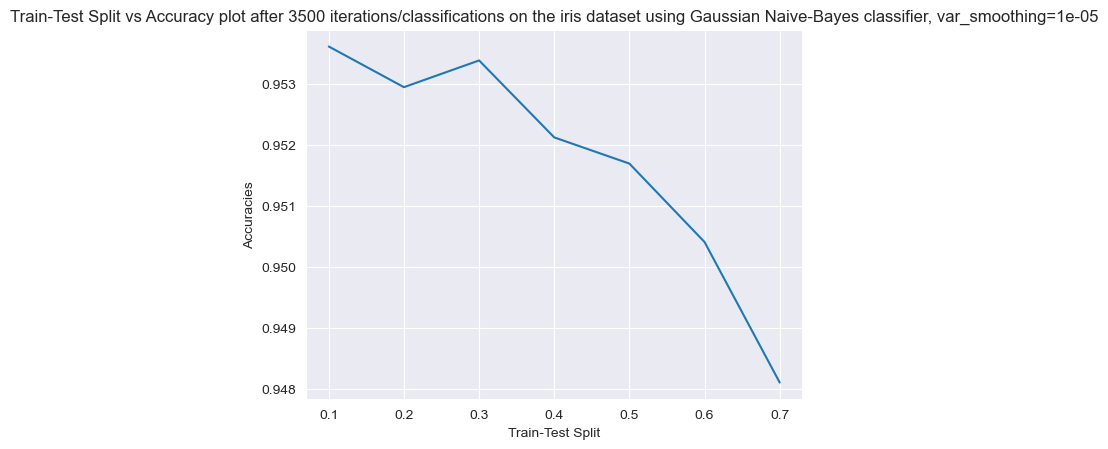

In [85]:
from sklearn.naive_bayes import GaussianNB


def split_plot_function_gaussianNB_iris(start_split=10, end_split=70, smooth=1):
  iris = load_iris()
  # print(iris)

  df = pd.DataFrame(iris.data, columns= iris.feature_names)
  df['target'] = iris.target # ground class stored in 'target' column/field of the dataframe
  # 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2

  # print(df)
  # print(iris.feature_names)
  accuracies = []
  split_values = []
  features = iris.feature_names # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  X = df[features]
  y = df['target']

  for i in range(start_split,end_split+1, 10):
    split_values.append(i/100)
    acc = 0
    for j in range(0,3500):
      train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = i/100)
      model = GaussianNB(var_smoothing=smooth)
      model.fit(train_X, train_y)
      pred_y = model.predict(test_X)
      acc += accuracy_score(test_y, pred_y)
    acc/=3500
    accuracies.append(acc)
  print(accuracies)
  print(split_values)

  data = pd.DataFrame(list(zip(accuracies, split_values)), columns=['Accuracies','Train-Test Split'])
  sns.lineplot(data=data, y='Accuracies', x='Train-Test Split').set_title("Train-Test Split vs Accuracy plot after 3500 iterations/classifications on the iris dataset using Gaussian Naive-Bayes classifier, var_smoothing="+str(smooth))

split_plot_function_gaussianNB_iris(smooth=1e-5)

[0.9306140350877223, 0.9312175438596428, 0.9299005847953425, 0.929795614035093, 0.9288519298245815, 0.928001754385988, 0.9270651629072992]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


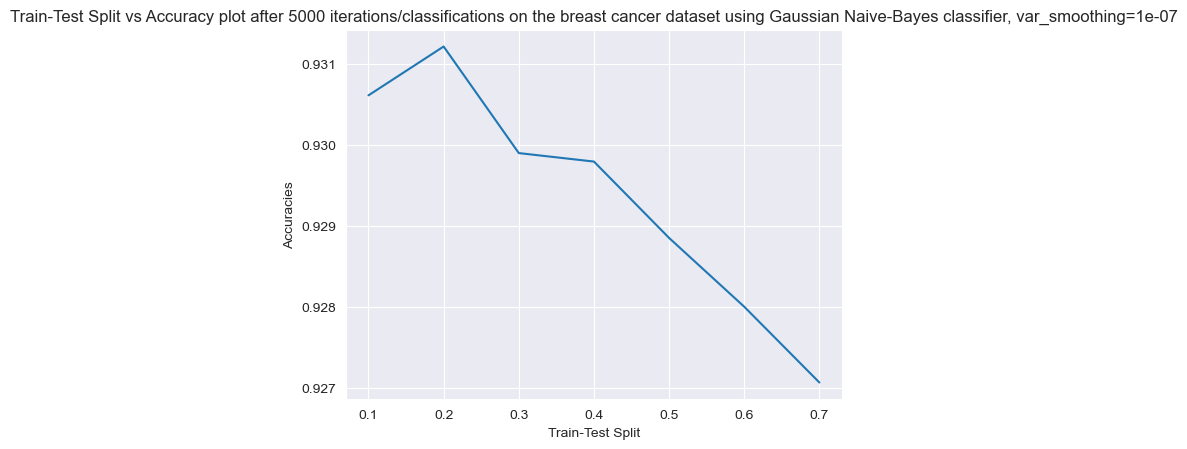

In [86]:

def split_plot_function_gaussianNB_breast_cancer(start_split=10, end_split=70, smooth=1):
  iris = load_breast_cancer()
  # print(iris)

  df = pd.DataFrame(iris.data, columns= iris.feature_names)
  df['target'] = iris.target # ground class stored in 'target' column/field of the dataframe
  # 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2

  # print(df)
  # print(iris.feature_names)
  accuracies = []
  split_values = []
  features = iris.feature_names # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  X = df[features]
  y = df['target']

  X = df[features]
  y = df['target']

  for i in range(start_split,end_split+1, 10):
    split_values.append(i/100)
    acc = 0
    for j in range(0,5000):
      train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = i/100)
      model = GaussianNB(var_smoothing=smooth)
      model.fit(train_X, train_y)
      pred_y = model.predict(test_X)
      acc += accuracy_score(test_y, pred_y)
    acc/=5000
    accuracies.append(acc)
  print(accuracies)
  print(split_values)

  data = pd.DataFrame(list(zip(accuracies, split_values)), columns=['Accuracies','Train-Test Split'])
  sns.lineplot(data=data, y='Accuracies', x='Train-Test Split').set_title("Train-Test Split vs Accuracy plot after 5000 iterations/classifications on the breast cancer dataset using Gaussian Naive-Bayes classifier, var_smoothing="+str(smooth))

split_plot_function_gaussianNB_breast_cancer(smooth=1e-7)

[0.7574285714285578, 0.7562181818181806, 0.7545272727272793, 0.7531941558441574, 0.7514739583333331, 0.7493084598698398, 0.746706691449816]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


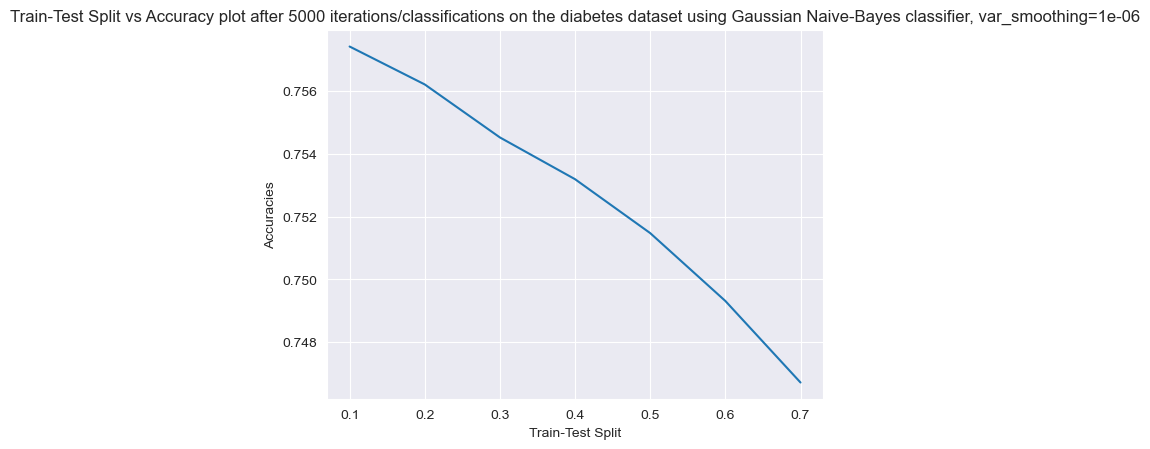

In [87]:
def split_plot_function_gaussianNB_diabetes(start_split=10, end_split=70, smooth=1):

  df = pd.read_csv('diabetes.csv')
  df = df.dropna();
  df.dropna(inplace=True)
  a = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
  for i in a:
    x = df[i].mean()
    df[i].fillna(x, inplace=True)

  accuracies = []
  split_values = []
  y = df['Outcome']
  X = df.drop('Outcome', axis=1)

  for i in range(start_split,end_split+1, 10):
    split_values.append(i/100)
    acc = 0
    for j in range(0,5000):
      train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = i/100)
      model = GaussianNB(var_smoothing=smooth)
      model.fit(train_X, train_y)
      pred_y = model.predict(test_X)
      acc += accuracy_score(test_y, pred_y)
    acc/=5000
    accuracies.append(acc)
  print(accuracies)
  print(split_values)

  data = pd.DataFrame(list(zip(accuracies, split_values)), columns=['Accuracies','Train-Test Split'])
  sns.lineplot(data=data, y='Accuracies', x='Train-Test Split').set_title("Train-Test Split vs Accuracy plot after 5000 iterations/classifications on the diabetes dataset using Gaussian Naive-Bayes classifier, var_smoothing="+str(smooth))

split_plot_function_gaussianNB_diabetes(smooth=1e-6)

[0.9349999999999976, 0.9349175438596443, 0.9345485380117141, 0.9344087719298232, 0.9331585964912416, 0.9327555555555713, 0.9315478696742095]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


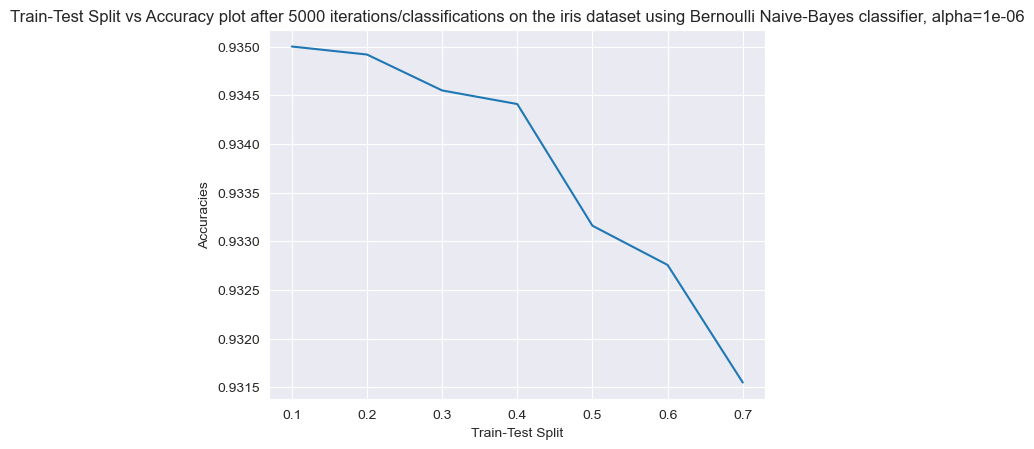

In [88]:
from sklearn.naive_bayes import BernoulliNB


def split_plot_function_bernoulliNB_breast_cancer(start_split=10, end_split=70, alpha=1):

  dataset = load_breast_cancer()


  df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
  df['target'] = dataset.target # ground class stored in 'target' column/field of the dataframe


  accuracies = []
  split_values = []
  features = dataset.feature_names
  X = df[features]
  y = df['target']

  for i in range(start_split,end_split+1, 10):
    split_values.append(i/100)
    acc = 0
    for j in range(0,5000):
      train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = i/100)
      scaler = StandardScaler()
      train_X = scaler.fit_transform(train_X)
      test_X = scaler.transform(test_X)
      model = BernoulliNB(alpha=alpha)
      model.fit(train_X, train_y)
      pred_y = model.predict(test_X)
      acc += accuracy_score(test_y, pred_y)
    acc/=5000
    accuracies.append(acc)
  print(accuracies)
  print(split_values)

  data = pd.DataFrame(list(zip(accuracies, split_values)), columns=['Accuracies','Train-Test Split'])
  sns.lineplot(data=data, y='Accuracies', x='Train-Test Split').set_title("Train-Test Split vs Accuracy plot after 5000 iterations/classifications on the iris dataset using Bernoulli Naive-Bayes classifier, alpha="+str(alpha))

split_plot_function_bernoulliNB_breast_cancer(alpha=1e-6)

[0.8956917293233188, 0.8959636591478559, 0.8959156223893102, 0.8954605263157607, 0.8958902255638711, 0.8960150375939477, 0.8961145721445919]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]


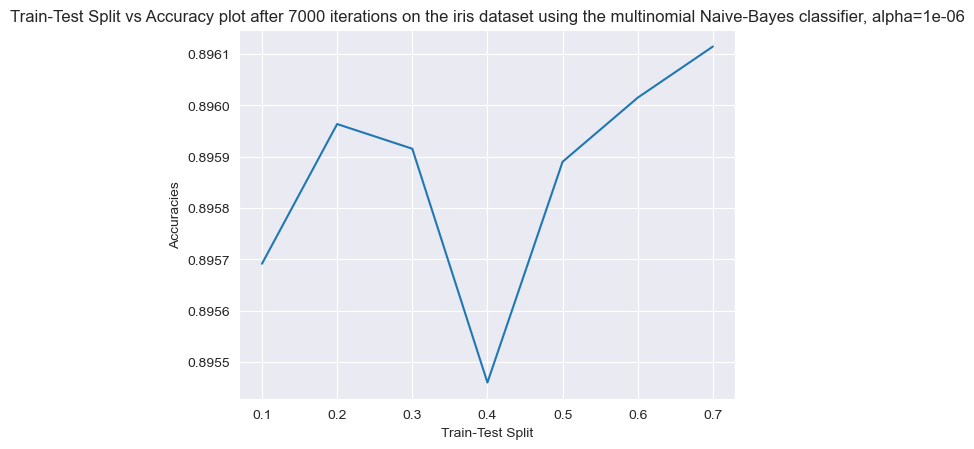

In [89]:
from sklearn.naive_bayes import MultinomialNB


def split_plot_function_multinomialNB_breast_cancer(start_split=10, end_split=70, alpha=1):

  dataset = load_breast_cancer()


  df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
  df['target'] = dataset.target # ground class stored in 'target' column/field of the dataframe


  accuracies = []
  split_values = []
  features = dataset.feature_names
  X = df[features]
  y = df['target']

  for i in range(start_split,end_split+1, 10):
    split_values.append(i/100)
    acc = 0
    for j in range(0,7000):
      train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = i/100)
      # scaler = StandardScaler()
      # train_X = scaler.fit_transform(train_X)
      # test_X = scaler.transform(test_X)
      model = MultinomialNB(alpha=alpha,fit_prior=True)
      model.fit(train_X, train_y)
      pred_y = model.predict(test_X)
      acc += accuracy_score(test_y, pred_y)
    acc/=7000
    accuracies.append(acc)
  print(accuracies)
  print(split_values)

  data = pd.DataFrame(list(zip(accuracies, split_values)), columns=['Accuracies','Train-Test Split'])
  sns.lineplot(data=data, y='Accuracies', x='Train-Test Split').set_title("Train-Test Split vs Accuracy plot after 7000 iterations on the iris dataset using the multinomial Naive-Bayes classifier, alpha="+str(alpha))

split_plot_function_multinomialNB_breast_cancer(alpha=1e-6)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

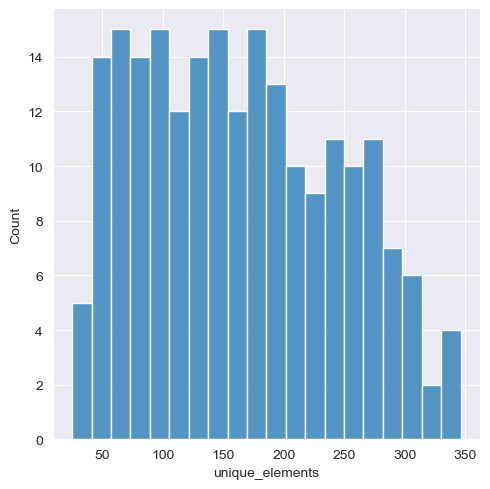

In [90]:
from sklearn.datasets import load_diabetes
import seaborn as sns

dataset = load_diabetes()
print(dataset)
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
X = df[dataset.feature_names]
unique_elements, counts_elements = np.unique(y, return_counts=True)
print(type(y))
d = pd.DataFrame(list(zip(unique_elements,counts_elements)), columns=['unique_elements', 'counts_elements'])
sns.displot(d.unique_elements,bins=20)